## ESERCIZIO 1-2:

la media della lista generata vale:                                      1.0455781644108917
il parametro tau passato con il metodo sezione aurea-loglikelihood vale: 0.9999669828558284
0.045611181555063274


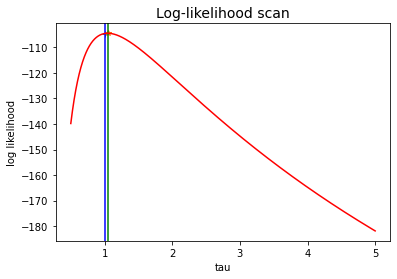

In [174]:
#Si scriva una libreria di funzioni per determinare il parametro τ della distribuzione esponenziale a partire
#da una lista di numeri riempita con numeri pseudo-casuali distribuiti 
#secondo una distribuzione di densità di probabilità esponenziale.

#Si confronti il risultato ottenuto con la media dei numeri salvati nella lista.

#Come dipende il risultato dall’intervallo inziale passato alla funzione sezione_aurea_max_LL?
#ES2: Plot the profile of the likelihood function and the point identified as its maximum.

import numpy as np
import matplotlib.pyplot as plt
from myrand import generate_uniform, generate_range, rand_exp, generate_exp
from likelihood import likelihood
from math import exp, log
from statystic import mean
import random

def exp_pdf (x, tau) :      
    '''
    the exponential probability density function
    '''
    if tau == 0. : print("")
    #if x < 0. : return 0.   #essendo un esponenziale proteggiamo la funzione da eventuali infiniti
    return np.exp (-1 * x / tau) / tau #voglio che restituisca un array MODIFICO exp in un Array


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---

def loglikelihood (theta, pdf, sample) :
    '''
    the log-likelihood function calculated
    for a sample of independent variables idendically distributed 
    according to their pdf with parameter theta
    '''
    risultato = 0.
    for x in sample:
        if (pdf (x, theta) > 0.) : risultato = risultato + log (pdf (x, theta))    
    return risultato

def sezioneAureaMax_LL (
    g,              # funzione di likelihood trovare il massimo
    pdf,            # probability density function of the events
    sample,         # sample of the events
    x0,             # estremo dell'intervallo          
    x1,             # altro estremo dell'intervallo                
    prec = 0.0001): # precisione della funzione        
    '''
    Funzione che calcola estremanti
    con il metodo della sezione aurea
    '''

    r = 0.618
    x2 = 0.
    x3 = 0.
    larghezza = abs (x1 - x0)
     
    while (larghezza > prec):
        x2 = x0 + r * (x1 - x0) 
        x3 = x0 + (1. - r) * (x1 - x0)  
      
        # si restringe l'intervallo tenendo fisso uno dei due estremi e spostando l'altro        
        if (g (x3,pdf,sample) < g (x2,pdf,sample)): 
            x0 = x3
            x1 = x1         
        else :
            x1 = x2
            x0 = x0          
            
        larghezza = abs (x1-x0)             
                                   
    return (x0 + x1) / 2. 


def main():
    

    t0=1 #mean

    data1=generate_exp(t0,100) #ECCO UNA LISTA DI NUMERI GENERATI CON DISTR ESPONENZIALE
    #print(data)
    
    media_true = mean(data1)
    print("la media della lista generata vale:                                     ", media_true)
        
    massimo = sezioneAureaMax_LL(loglikelihood, exp_pdf, data1, 0., 1.)

    print("il parametro tau passato con il metodo sezione aurea-loglikelihood vale:", massimo)
    print(abs(media_true-massimo))
   

 #ES2: Plot the profile of the likelihood function and the point identified as its maximum.

    fig, ax = plt.subplots ()
    ax.set_title ('Log-likelihood scan', size=14)
    ax.set_xlabel ('tau')
    ax.set_ylabel ('log likelihood')
    
    

    tau = np.linspace (0.5, 5., 10000)
    ll  = np.arange (0., tau.size)

    for i in range (tau.size) :
        ll[i] = loglikelihood (tau[i], exp_pdf, data1)

    x1=massimo
    y1=loglikelihood(massimo,exp_pdf,data1)
    plt.plot(x1,y1, '+')
    
    x2=media_true
    y2=loglikelihood(media_true,exp_pdf,data1)
    plt.plot(x2,y2, '*')
    
    plt.axvline(x = massimo, color = 'b' )
    plt.axvline(x = media_true, color = 'g')
    
    plt.plot (tau, ll, 'r')
    plt.show ()

if __name__ == "__main__":
    main ()

    

In [ ]:
#Si modifichi la funzione sezione_aurea_max_LL, aggiungendo la stampa a schermo dei valori degli estremi 
#dell’intevallo considerato ad ogni iterazione, per osservarne il restringimento durante l’esecuzione del 
#programma.

In [ ]:
#Si modifichi la funzione loglikelihood in modo che calcoli il logaritmo del prodotto dei valori della funzione 
#di densità di probabilità, piuttosto che la somma dei singoli logaritmi.
#Come cambia il comportamento dell’algoritmo?